# Which words change most in meaning over the _Sattelzeit_?

In [1]:
# Test BPO
from koselleck import *

In [12]:
dfnov=pd.read_pickle(FN_NOVELTY_DATA)
ever_nov = set(dfnov.query('p_peak<0.1').index)
# ever_nov

In [13]:
# load decade level data
dfpiv_abs,dfpiv_freq = get_decade_level_data()
# load diff data by run
dfruns=pd.read_csv(FN_CHANGE_RUNS).set_index('word')
# Load diffdata avg
dfchange=get_dfchange()

In [14]:
# dfchange.loc[get_words_ever_abs()].sort_values('perc_noiseaware').dropna().tail(45)

In [15]:
gby=['class_abs','class_change']
dfchange[dfchange.class_signif==True].groupby(gby).size()

class_abs  class_change
+Abstract  +Changed        236
           -Changed        298
           ~Noisy           84
+Concrete  +Changed        223
           -Changed        284
           ~Noisy           89
Abs~Conc   +Changed        660
dtype: int64

## Arrow plots

In [18]:
figdf=dfchange.reset_index().query(
#     'is_clean_noiseaware==True & class_abs!="Abs~Conc" & perc_abstractness>=90'#' & (score1_abstractness>0.5 | score2_abstractness>0.5)
#     'is_clean_noiseaware>0 & class_abs!="Abs~Conc" & (score1_abstractness>1 | score2_abstractness>1)'
    'class_abs!="Abs~Conc" & ((score1_abstractness>1 & score2_abstractness<1) | (score1_abstractness<1 & score2_abstractness>1))'
).query(
    'is_clean_noiseaware>0 & perc_local>0'
)



figdf=figdf.melt(id_vars=['word','perc_local','score_diff_abstractness','perc_abstractness','is_clean_noiseaware','class_abs'],
                 value_vars=['score1_abstractness','score2_abstractness'])
figdf=figdf.sort_values(['word','variable'], ascending=[1,1])
figdf=figdf[figdf.word.isin(ever_nov & get_words_ever_abs())]
figdf=figdf[~figdf.word.isin({
    'demon'
})]
# figdf=pd.concat(g[1] for i,g in enumerate(figdf.groupby('word')) if len(g)==2)
figdf

,word,perc_local,score_diff_abstractness,perc_abstractness,is_clean_noiseaware,class_abs,variable,value
1,accord,96.522607,0.666903,87.247207,1.0,+Abstract,score1_abstractness,0.460368
195,accord,96.522607,0.666903,87.247207,1.0,+Abstract,score2_abstractness,1.127270
3,advantage,42.151142,-0.444056,74.516364,1.0,+Concrete,score1_abstractness,1.198799
197,advantage,42.151142,-0.444056,74.516364,1.0,+Concrete,score2_abstractness,0.754743
4,adversary,47.542261,-0.492317,76.458545,1.0,+Concrete,score1_abstractness,1.172371
...,...,...,...,...,...,...,...,...
385,viewing,94.694847,1.426521,98.981369,1.0,+Abstract,score2_abstractness,1.003894
192,violence,5.762067,0.576068,83.768623,1.0,+Abstract,score1_abstractness,0.531480
386,violence,5.762067,0.576068,83.768623,1.0,+Abstract,score2_abstractness,1.107548
193,world,33.420560,-0.545607,82.371679,1.0,+Concrete,score1_abstractness,1.303003


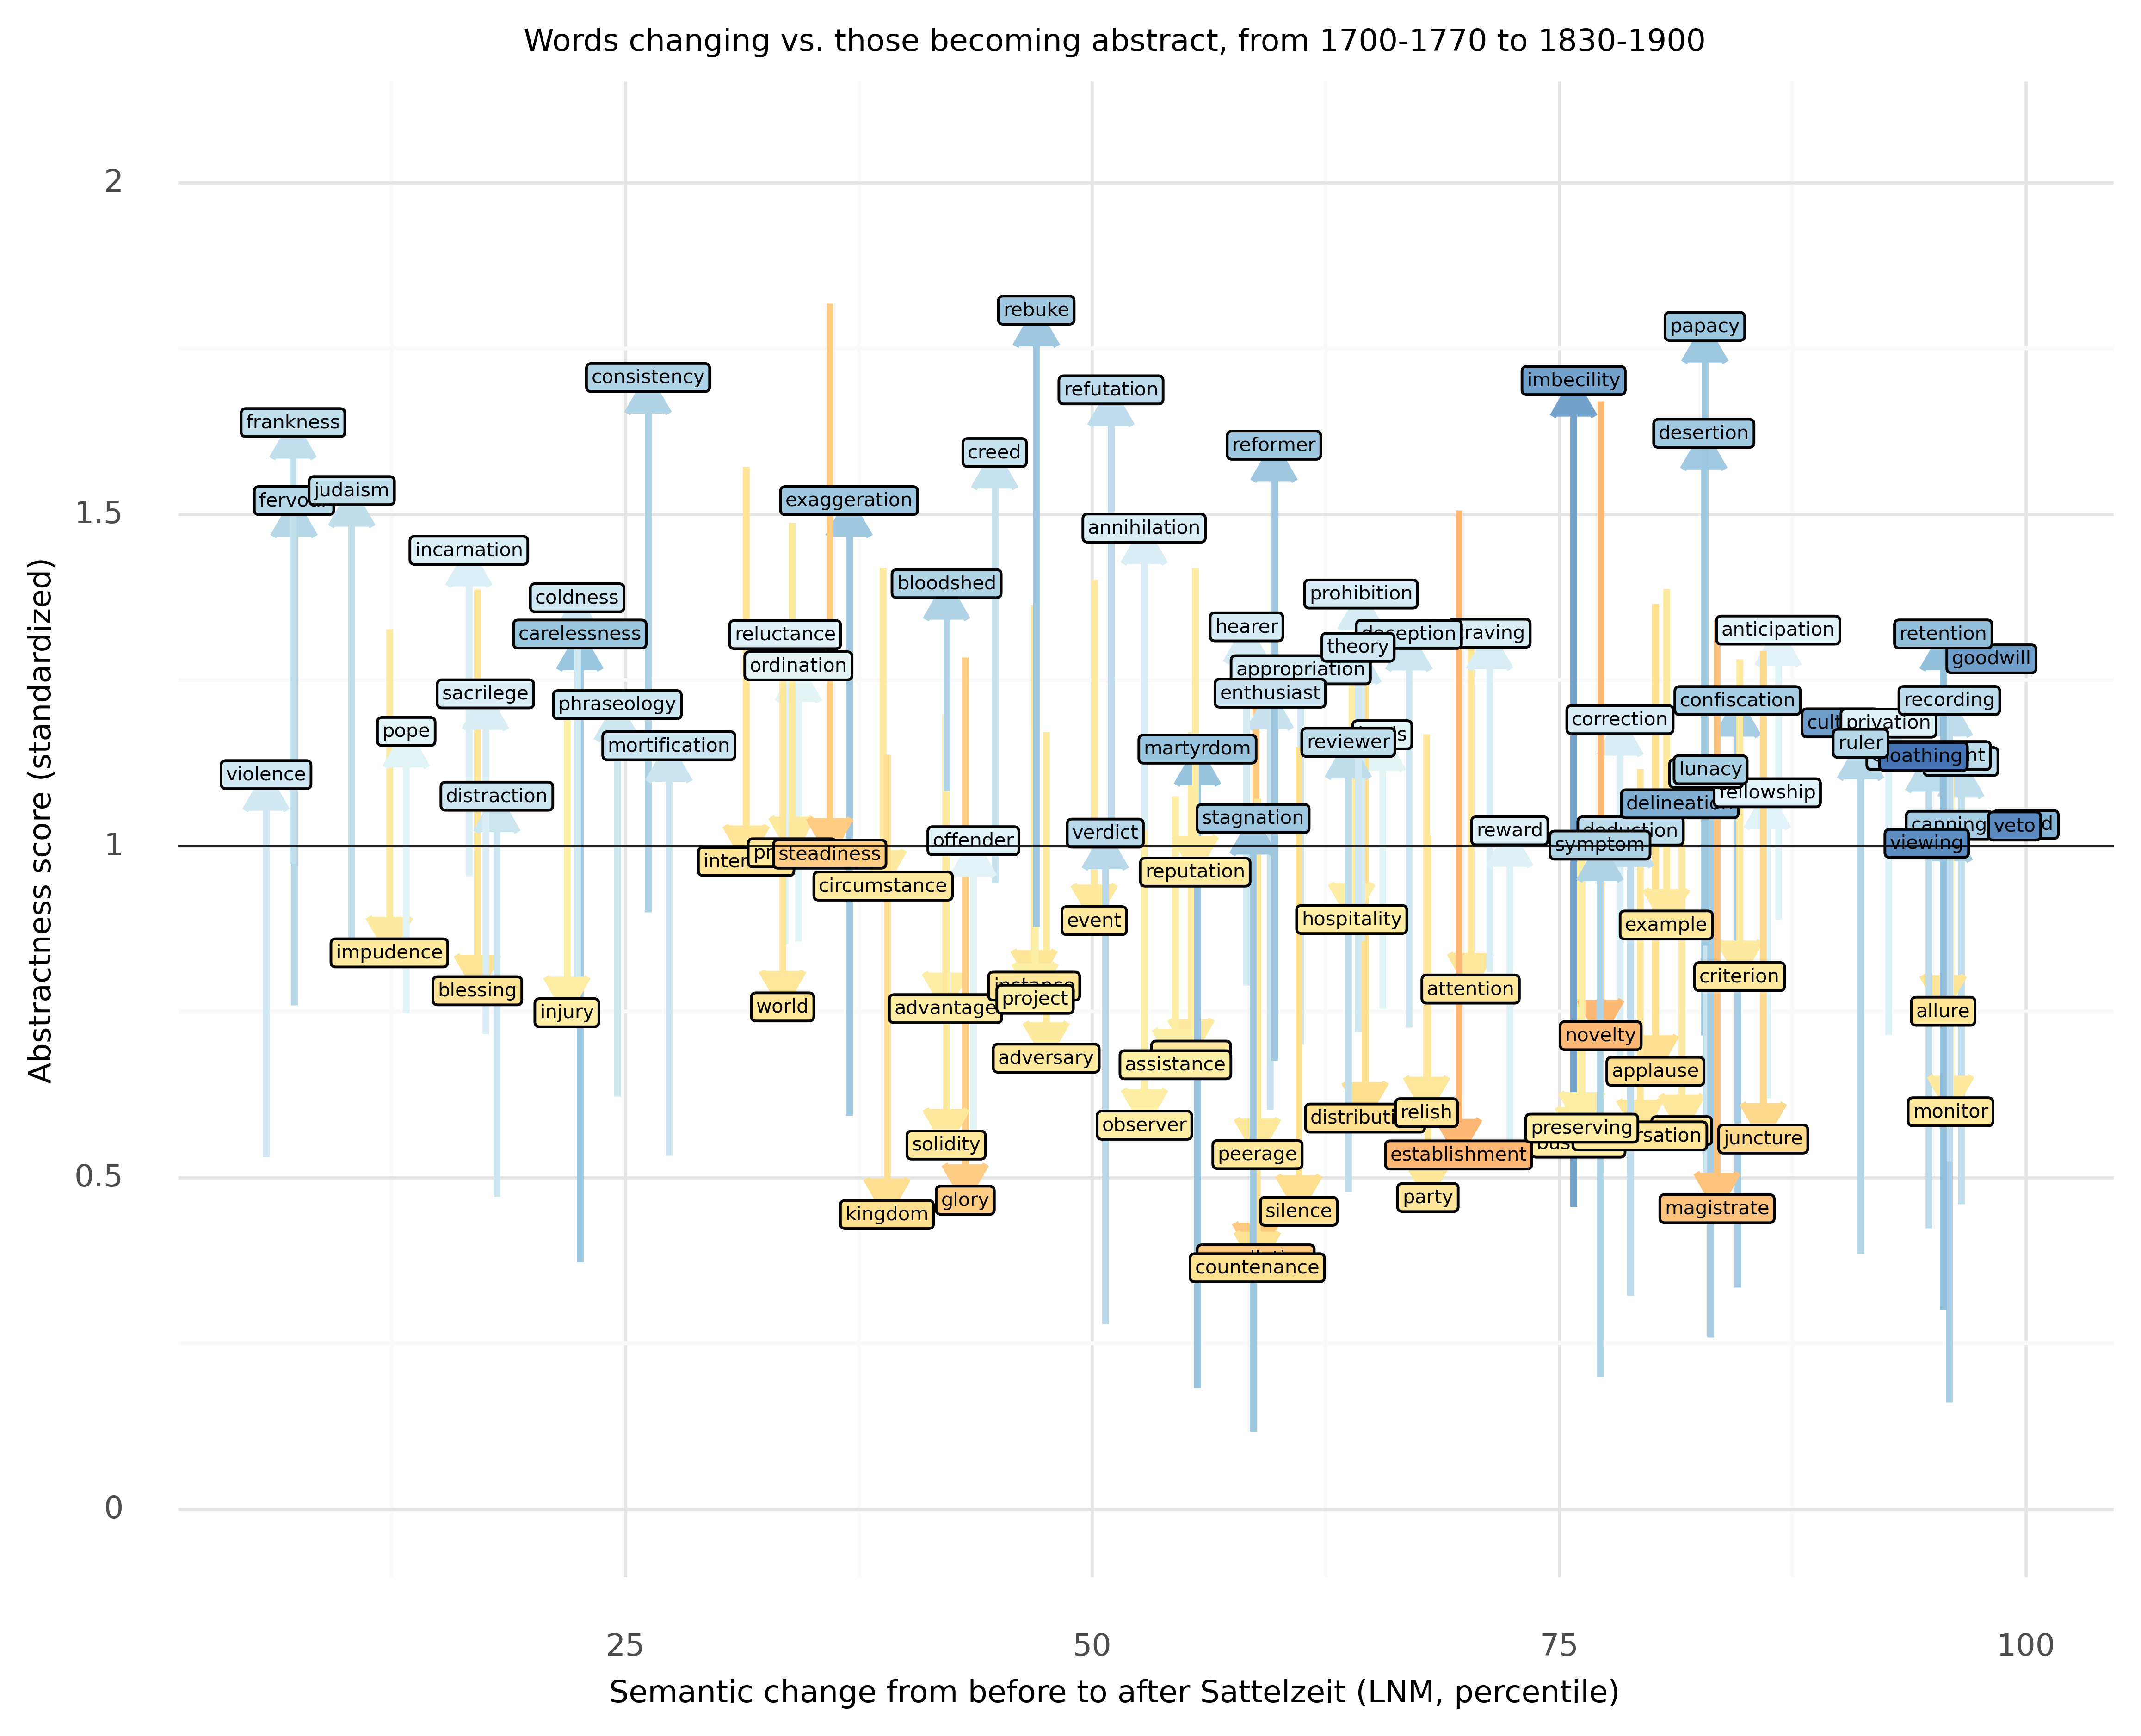

<ggplot: (8779621837053)>

In [35]:

#p9.options.figure_size=11,11
fig=start_fig(
        x='perc_local',
        y='value',
        label='word',
        fill='score_diff_abstractness',
        theme='minimal',
        figure_size=(9,7),
    data=figdf
)

fig+=p9.geom_path(p9.aes(group='word', color='score_diff_abstractness'), arrow=p9.geoms.arrow(length=.15,type='closed'), size=1)
# fig+=p9.geom_label(size=3,data=figdf[figdf.variable.str.contains('1')])
fig+=p9.geom_label(size=5,data=figdf[figdf.variable.str.contains('2')])
# fig+=p9.geom_point(size=1,data=figdf[figdf.variable.str.contains('1')])
# fig+=p9.xlim(0,100)
# fig+=p9.ylim(-1.8,1.8)
# fig+=p9.ylim(-.75,2.25)
fig+=p9.ylim(0,2.05)
fig+=p9.scale_fill_distiller(type='div',direction=1,palette='RdYlBu',guide=None)
fig+=p9.scale_color_distiller(type='div',direction=1,palette='RdYlBu',guide=None)
fig+=p9.geom_hline(yintercept=1,size=0.25)
fig+=p9.labs(x='Semantic change from before to after Sattelzeit (LNM, percentile)',
             y='Abstractness score (standardized)',
            title='Words changing vs. those becoming abstract, from 1700-1770 to 1830-1900')
# fig+=p9.facet_wrap('class_abs',ncol=1)
ofnfn='figures/fig.abstractifying-vs-changing.v1.png'
fig.save(ofnfn)
upfig(ofnfn)
fig